---
---

# Team M.V.P Data Cleaning Submission

---
---

Submitted by:

 Vivek Venkateshprasad \
 862468868 \
 vv002

 Prathik Somanath \
 862467832 \
 psoma005
 
 Maedeh Makki \
 862393635 \
 mmakk004

 ---
 ---

---

### Step 1: Downloading the dataset and performing Basic Cleaning

---


We download the accident dataset.

~~Only problem is ... Our accident dataset is Huuuuge, 7.7 Million Records Huge. None of our local computer could run this. So, we decided to use a smaller version of our dataset.~~

~~https://huggingface.co/datasets/nateraw/us-accidents~~

We managed to condense the large dataset to use it to account for the biased nature of the previous dataset


In [1]:
# import pandas as pd
# chunksize = 10 ** 8
# useful_columns = ['State', 'Severity', 'Start_Time','Start_Lat','Start_Lng']
# for df in pd.read_csv("acc.csv", chunksize=chunksize):
#     df = df[useful_columns]
#     df.to_csv('data.csv', mode='a', index=False)
    

In [2]:
import pandas as pd

df = pd.read_csv("data.csv")
df.head(5)

,State,Severity,Start_Time,Start_Lat,Start_Lng
0,OH,3,2016-02-08 05:46:00,39.865147,-84.058723
1,OH,2,2016-02-08 06:07:59,39.928059,-82.831184
2,OH,2,2016-02-08 06:49:27,39.063148,-84.032608
3,OH,3,2016-02-08 07:23:34,39.747753,-84.205582
4,OH,2,2016-02-08 07:39:07,39.627781,-84.188354


We see that there are a lot columns which are not useful to us. We need to clean this data

Let us take a look at all the columns and determine which is useful to us

In [3]:
df.columns

Index(['State', 'Severity', 'Start_Time', 'Start_Lat', 'Start_Lng'], dtype='object')

In [4]:
useful_columns = ['State', 'Severity', 'Start_Time','Start_Lat','Start_Lng']
df = df[useful_columns]
df.head(5)

,State,Severity,Start_Time,Start_Lat,Start_Lng
0,OH,3,2016-02-08 05:46:00,39.865147,-84.058723
1,OH,2,2016-02-08 06:07:59,39.928059,-82.831184
2,OH,2,2016-02-08 06:49:27,39.063148,-84.032608
3,OH,3,2016-02-08 07:23:34,39.747753,-84.205582
4,OH,2,2016-02-08 07:39:07,39.627781,-84.188354


Okay, that looks good. Now, we need to merge this with the accident dataset. Let us load that up from here:

https://www.gigasheet.com/sample-data/per-capita-us-alcohol-consumption

In [5]:
df2 = pd.read_csv("alcohol.csv")
df2.head()

,Year,State,Beverage_Type,Gallons_of_Beverage,Gallons_of_Ethanol,Population_14_Plus,Ethanol_Per_Capita_14_Plus,Decile_14_Plus,Population_21_Plus,Ethanol_Per_Capita_21_Plus,Decile_21_Plus,Data_Source_Type,Time_Varying_ABV,Gallons_of_Ethanol_from_ABV
0,1970,Alabama,Spirits,3863000.0,1738350,249900,6956,9.0,202000,8606,9.0,.,NaN,NaN
1,1970,Alabama,Wine,1412000.0,225920,249900,904,9.0,202000,1118,9.0,.,NaN,NaN
2,1970,Alabama,Beer,33098000.0,1489410,249900,5960,10.0,202000,7373,10.0,.,NaN,NaN
3,1970,Alabama,All Beverages,NaN,3453680,249900,13820,10.0,202000,17097,10.0,.,NaN,NaN
4,1970,Alaska,Spirits,945000.0,425250,20500,20744,1.0,16500,25773,1.0,.,NaN,NaN


Let us look at the available columns in this dataset

In [6]:
df2.columns

Index(['Year', 'State', 'Beverage_Type', 'Gallons_of_Beverage',
       'Gallons_of_Ethanol', 'Population_14_Plus',
       'Ethanol_Per_Capita_14_Plus', 'Decile_14_Plus', 'Population_21_Plus',
       'Ethanol_Per_Capita_21_Plus', 'Decile_21_Plus', 'Data_Source_Type',
       'Time_Varying_ABV', 'Gallons_of_Ethanol_from_ABV'],
      dtype='object')

We don't have any age groups mentioned in our dataset, so we need to remove it. We also do not care about how many beverages a person had. We just care about how drunk they got and that can be extracted from the "Gallons_of_ethanol" column. We also need to merge the populations and get the total population to get a new ethanol_per_capita column.

In [7]:
useful_columns = ['Year', 'State', 'Beverage_Type','Gallons_of_Ethanol', 'Population_14_Plus', 'Population_21_Plus']
df2 = df2[useful_columns]
df2.head(5)

,Year,State,Beverage_Type,Gallons_of_Ethanol,Population_14_Plus,Population_21_Plus
0,1970,Alabama,Spirits,1738350,249900,202000
1,1970,Alabama,Wine,225920,249900,202000
2,1970,Alabama,Beer,1489410,249900,202000
3,1970,Alabama,All Beverages,3453680,249900,202000
4,1970,Alaska,Spirits,425250,20500,16500


We can immediately see a problem here. There is a semantic mismatch in the state names from the first column to the second.

For example, 

df1["State"] = "OH"

df2["State"] = "Ohio"

Let us fix this

I found this mapping dictionary here: https://gist.github.com/mshafrir/2646763

In [8]:
state_abbreviation_to_full_name = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DC': 'District of Columbia', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois',
    'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana',
    'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota',
    'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon',
    'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota',
    'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia',
    'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

In [9]:
df["State"] = df["State"].replace(state_abbreviation_to_full_name)
df.head(5)

,State,Severity,Start_Time,Start_Lat,Start_Lng
0,Ohio,3,2016-02-08 05:46:00,39.865147,-84.058723
1,Ohio,2,2016-02-08 06:07:59,39.928059,-82.831184
2,Ohio,2,2016-02-08 06:49:27,39.063148,-84.032608
3,Ohio,3,2016-02-08 07:23:34,39.747753,-84.205582
4,Ohio,2,2016-02-08 07:39:07,39.627781,-84.188354


Looks good. Now we need to add the popualtions of the two columns and create a new column just called "population" in the alcohol dataset. Then calculate the new ethanol per capita

In [10]:
df2['Population'] = df2["Population_14_Plus"] + df2["Population_21_Plus"]
df2['Ethanol_per_capita'] = round(df2['Gallons_of_Ethanol'] / df2['Population'] * 1000)
df2 = df2.drop(['Population_14_Plus', 'Population_21_Plus'], axis=1)
df2.head(5)

,Year,State,Beverage_Type,Gallons_of_Ethanol,Population,Ethanol_per_capita
0,1970,Alabama,Spirits,1738350,451900,3847.0
1,1970,Alabama,Wine,225920,451900,500.0
2,1970,Alabama,Beer,1489410,451900,3296.0
3,1970,Alabama,All Beverages,3453680,451900,7643.0
4,1970,Alaska,Spirits,425250,37000,11493.0


Okay, Now our accident dataset only is present from 2016 - 2021. So, all the data previous and after it is useless to us. Let us clean this out

In [11]:
df2 = df2[(df2['Year'] > 2015) & (df2['Year'] < 2022)].reset_index(drop=True)
df2.head(5)

,Year,State,Beverage_Type,Gallons_of_Ethanol,Population,Ethanol_per_capita
0,2016,Alabama,Spirits,2631168,760007,3462.0
1,2016,Alabama,Wine,1043962,760007,1374.0
2,2016,Alabama,Beer,4401225,760007,5791.0
3,2016,Alabama,All Beverages,8076355,760007,10627.0
4,2016,Alaska,Spirits,732610,112306,6523.0


In [12]:
df2["State"].value_counts().shape

(56,)

This doesn't seem right. Last time I checked there were 50 States + D.C. So why are there 56 entries ?

On closer inspection we see some data for 'Northeast Region', 'Midwest Region', 'South Region', 'West Region', 'United States' . We can drop these

In [13]:
states_to_drop = ['Northeast Region', 'Midwest Region', 'South Region', 'West Region', 'United States']

df2 = df2[~df2['State'].isin(states_to_drop)]
df2["State"].value_counts().shape

(51,)

This looks better.

This marks and end of our basic cleaning

---

### Step 2:
### Processing Data for visualizations and further analysis

---




#### Processing Accident Data by State and Year
This code snippet demonstrates how to process the accident data by converting date information, handling missing values, extracting year, and aggregating accident counts by state and year.

First, let us first fix the datetime format in our accident dataset

In [14]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed') # it has multiple datetime formats hence mixed

# Create new columns for day of the week, date, and year
df['Day_of_Week'] = df['Start_Time'].dt.day_name()      
df['Date'] = df['Start_Time'].dt.date                
df['Year'] = df['Start_Time'].dt.year 
df = df[(df['Year'] > 2015) & (df['Year'] < 2022)].reset_index(drop=True)
df.head(2)

,State,Severity,Start_Time,Start_Lat,Start_Lng,Day_of_Week,Date,Year
0,Ohio,3,2016-02-08 05:46:00,39.865147,-84.058723,Monday,2016-02-08,2016
1,Ohio,2,2016-02-08 06:07:59,39.928059,-82.831184,Monday,2016-02-08,2016


Let us now count the accidents and group them by the state and year

In [15]:
accidents_by_state_and_year = df.groupby(["State", "Year"]).size().reset_index(name="Accident_Count")
accidents_by_state_and_year.head(6)

,State,Year,Accident_Count
0,Alabama,2016,135
1,Alabama,2017,2904
2,Alabama,2018,14100
3,Alabama,2019,19238
4,Alabama,2020,20185
5,Alabama,2021,23510


#### Merging Alcohol Consumption and Accident Data by State and Year

This code snippet merges two datasets, one on alcohol consumption and the other on accident counts, by state and year. It then filters out regional aggregate rows, focusing on specific states.

In [16]:
merged_df = pd.merge(df2, accidents_by_state_and_year, on=['State', 'Year'], how='left').dropna()
merged_df.head(5)


,Year,State,Beverage_Type,Gallons_of_Ethanol,Population,Ethanol_per_capita,Accident_Count
0,2016,Alabama,Spirits,2631168,760007,3462.0,135.0
1,2016,Alabama,Wine,1043962,760007,1374.0,135.0
2,2016,Alabama,Beer,4401225,760007,5791.0,135.0
3,2016,Alabama,All Beverages,8076355,760007,10627.0,135.0
8,2016,Arizona,Spirits,4473105,1070605,4178.0,2770.0


In [17]:
#Let us take the data for all the beverages.
merged_df_all_beverages = merged_df[merged_df['Beverage_Type'] == 'All Beverages']
merged_df_all_beverages.head(5)

,Year,State,Beverage_Type,Gallons_of_Ethanol,Population,Ethanol_per_capita,Accident_Count
3,2016,Alabama,All Beverages,8076355,760007,10627.0,135.0
11,2016,Arizona,All Beverages,13189089,1070605,12319.0,2770.0
15,2016,Arkansas,All Beverages,4392473,461171,9525.0,26.0
19,2016,California,All Beverages,75148499,6060076,12401.0,140452.0
23,2016,Colorado,All Beverages,12837432,862980,14876.0,1324.0


Okay that's good. Way to go Arkansas you have very less accidents. However, we need to find out the accident per capita to get the true picture. Lets create a column for that

In [53]:
pd.options.mode.chained_assignment = None 
merged_df_all_beverages['Accidents_per_capita'] = round(merged_df_all_beverages['Accident_Count'] / merged_df_all_beverages['Population'] * 10000)
merged_df_all_beverages.head(5)

,Year,State,Beverage_Type,Gallons_of_Ethanol,Population,Ethanol_per_capita,Accident_Count,Accidents_per_capita
3,2016,Alabama,All Beverages,8076355,760007,10627.0,135.0,2.0
11,2016,Arizona,All Beverages,13189089,1070605,12319.0,2770.0,26.0
15,2016,Arkansas,All Beverages,4392473,461171,9525.0,26.0,1.0
19,2016,California,All Beverages,75148499,6060076,12401.0,140452.0,232.0
23,2016,Colorado,All Beverages,12837432,862980,14876.0,1324.0,15.0


In [19]:
len(merged_df_all_beverages.groupby("State"))

49

Seems like there are a couple of states missing. They are Hawaii and Alaska for the accidents.

Had to add a multiplier of 10000 because some states had way too few accidents compared to people. Still Arkansas looks to be doing well. Go Arkansas !

#### Holiday trend analysis 
Now we need to add more columns to our dataframe to analyze accident trends. Whether they have occured during holidays, which day of the week, etc.. 

In [20]:
import holidays
#this package will provide us the list of dates of holidays
for date, name in sorted(holidays.US(years=2024).items()):
    print(date, name)

2024-01-01 New Year's Day
2024-01-15 Martin Luther King Jr. Day
2024-02-19 Washington's Birthday
2024-05-27 Memorial Day
2024-06-19 Juneteenth National Independence Day
2024-07-04 Independence Day
2024-09-02 Labor Day
2024-11-11 Veterans Day
2024-11-28 Thanksgiving
2024-12-25 Christmas Day


In [21]:
# List of US holidays
us_holidays = holidays.US()
from datetime import date, timedelta

def whichHoliday(x):
    for i in [-1,0,1]:
        if x + timedelta(days=i) in us_holidays:
            return us_holidays.get(x + timedelta(days=i))
    return None
# Create Holiday flag and Holiday name columns
# df['Is_Holiday'] = df['Start_Time'].apply(lambda x: x in us_holidays)
# df['Holiday_Name'] = df['Start_Time'].apply(lambda x: us_holidays.get(x) if x in us_holidays else None)
df['Holiday_Name'] = df['Start_Time'].apply(whichHoliday)

df.head(5)

,State,Severity,Start_Time,Start_Lat,Start_Lng,Day_of_Week,Date,Year,Holiday_Name
0,Ohio,3,2016-02-08 05:46:00,39.865147,-84.058723,Monday,2016-02-08,2016,None
1,Ohio,2,2016-02-08 06:07:59,39.928059,-82.831184,Monday,2016-02-08,2016,None
2,Ohio,2,2016-02-08 06:49:27,39.063148,-84.032608,Monday,2016-02-08,2016,None
3,Ohio,3,2016-02-08 07:23:34,39.747753,-84.205582,Monday,2016-02-08,2016,None
4,Ohio,2,2016-02-08 07:39:07,39.627781,-84.188354,Monday,2016-02-08,2016,None


In [22]:
holiday_df = df[df['Holiday_Name'] == 'Christmas Day']
holiday_df.head(5)

,State,Severity,Start_Time,Start_Lat,Start_Lng,Day_of_Week,Date,Year,Holiday_Name
8505,California,2,2016-12-24 00:05:18,38.823105,-123.027420,Saturday,2016-12-24,2016,Christmas Day
8506,California,3,2016-12-24 00:19:10,37.507172,-122.338524,Saturday,2016-12-24,2016,Christmas Day
8507,California,2,2016-12-24 00:46:44,37.724007,-122.401474,Saturday,2016-12-24,2016,Christmas Day
8508,California,2,2016-12-24 00:45:07,37.383385,-122.069557,Saturday,2016-12-24,2016,Christmas Day
8509,California,3,2016-12-24 01:59:50,37.317062,-121.940590,Saturday,2016-12-24,2016,Christmas Day


#### Now our data is all clean and ready for visualizations. We can use these various datasets we have integrated to extract different type of information

---
---

# Data Visualization

*Note: There are some changes from the previous data cleaning ipynb. 
1. We have now added +1,-1 to the days to adjust for the holiday eves and when people might be travelling.
2. We have gathered data from a bigger dataset to account for the biased data present in our previous dataset.
3. Clearly pointed out that the population size is of the drinking population. Not the total.

Let us see which day has the most number of accidents on

In [23]:
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])

# Extract month and day
df['Month-Day'] = df['Date'].dt.strftime('%m-%d')

# Group by month-day and count occurrences
top_10_counts = (
    df.groupby('Month-Day')
    .size()
    .sort_values(ascending=False)
    .head(10)
)

holiday_counts = df.groupby('Holiday_Name').size()

# Need to fix the data for nice visual on the graph
holiday_counts["New Year's Day"] += holiday_counts["New Year's Day (observed)"]
holiday_counts["Christmas Day"] += holiday_counts["Christmas Day (observed)"]
holiday_counts["Juneteenth National Independence Day"] += holiday_counts["Juneteenth National Independence Day (observed)"]
holiday_counts["Veterans Day"] += holiday_counts["Veterans Day (observed)"]
holiday_counts["Independence Day"] += holiday_counts["Independence Day (observed)"]
holiday_counts["Juneteenth"] = holiday_counts["Juneteenth National Independence Day"]
holiday_counts["MLK Jr. Day"] = holiday_counts["Martin Luther King Jr. Day"]
holiday_counts["Christmas"] = holiday_counts["Christmas Day"]
holiday_counts["New Year's"] = holiday_counts["New Year's Day"]
holiday_counts["President's Day"] = holiday_counts["Washington's Birthday"]
del holiday_counts["Washington's Birthday"]
del holiday_counts["New Year's Day"]
del holiday_counts["Christmas Day"]
del holiday_counts["Martin Luther King Jr. Day"]
del holiday_counts["Juneteenth National Independence Day"]
del holiday_counts["New Year's Day (observed)"] 
del holiday_counts["Independence Day (observed)"]
del holiday_counts["Veterans Day (observed)"]
del holiday_counts["Juneteenth National Independence Day (observed)"]
del holiday_counts["Christmas Day (observed)"]

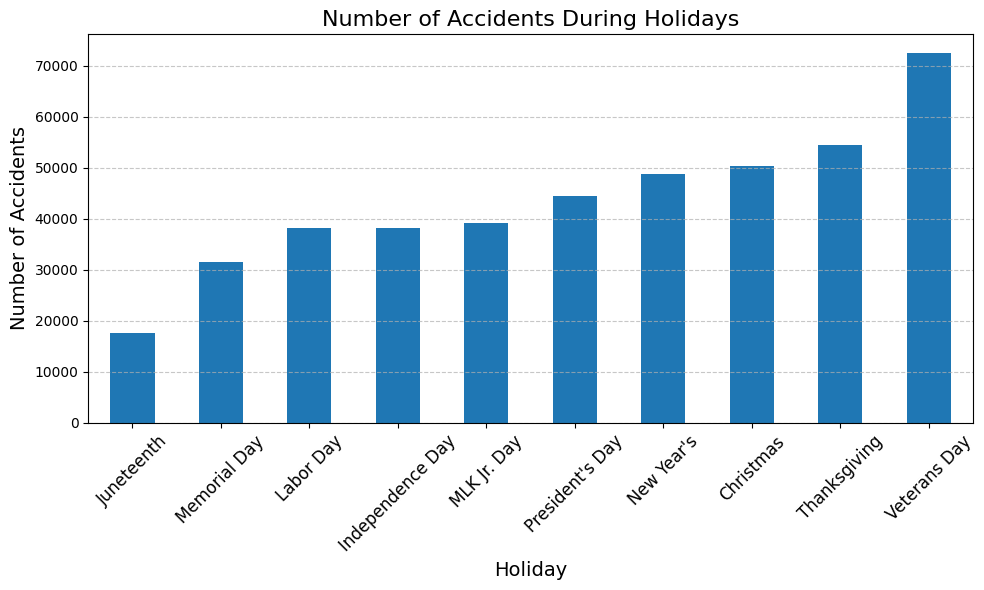

In [24]:
plt.figure(figsize=(10, 6))
holiday_counts.sort_values(ascending=True).plot(kind='bar')
plt.title("Number of Accidents During Holidays", fontsize=16)
plt.xlabel("Holiday", fontsize=14)
plt.ylabel("Number of Accidents", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This is interesting ... Veterans day seem to have the highest number of accidents.

Now, let's compare the average deaths during a holiday and average deaths during a non-holiday day. 

Here, the denominator to calculate the average for a non-holiday day is '333' because we have considered a 3 days for the holiday and there are a total of ~366 days in a year. So, the total number of non holiday days will be: 

366 - 33(11 holidays * 3 holidays each) = 333

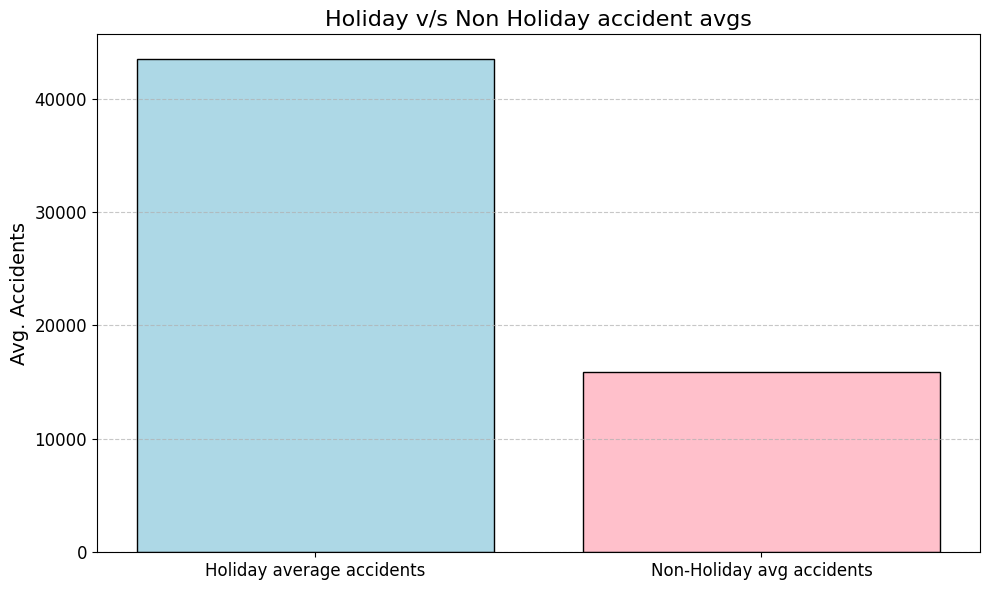

In [25]:
non_holiday_counts = df[df["Holiday_Name"].isna()].shape[0]

plt.figure(figsize=(10, 6))
plt.bar(["Holiday average accidents","Non-Holiday avg accidents"], [holiday_counts.mean(),non_holiday_counts/333], color=['lightblue','pink'], edgecolor='black')
plt.title("Holiday v/s Non Holiday accident avgs", fontsize=16)
plt.ylabel("Avg. Accidents", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We see a huge difference in accidents that have occured during holidays compared to normal days. This can be for a variety of reasons, let us see if one of the reasons can be alcohol consumption.

Let us see how alcohol actually correlates to the accidents in the US by visualising it on a map.

In [26]:
#for some reason plotly takes in only abbreviations
state_to_abbreviation = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR",
    "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE",
    "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID",
    "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", "Kansas": "KS",
    "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD",
    "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS",
    "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV",
    "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY",
    "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
    "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT",
    "Vermont": "VT", "Virginia": "VA", "Washington": "WA", "West Virginia": "WV",
    "Wisconsin": "WI", "Wyoming": "WY","District of Columbia":"DC"
}
chloro_data_accidents = merged_df_all_beverages[["State", "Ethanol_per_capita", "Accidents_per_capita"]].groupby("State").sum(numeric_only=True).reset_index()
chloro_data_accidents["States"] = chloro_data_accidents["State"].map(state_to_abbreviation)

In [27]:
import plotly.express as px

fig = px.choropleth(chloro_data_accidents, locations='States', color='Accidents_per_capita', scope="usa", locationmode="USA-states",title="Accidents per 10,000 drinking residents per state",hover_data="State")
 
fig.show()

In [28]:
import plotly.express as px

fig = px.choropleth(chloro_data_accidents, locations='States', color='Ethanol_per_capita', scope="usa", locationmode="USA-states",title="Ethanol per capita per state",hover_data="State")
 
fig.show()

Okay great, we can see which state has the most accidents and ethanol per capita. Now, we need to see if those two are correlated.
Below are the top ten States by accidents and Ethanol

In [29]:
acc_list = list(chloro_data_accidents.sort_values(by="Accidents_per_capita", ascending=False).reset_index(drop=True)["State"])
eth_list = list(chloro_data_accidents.sort_values(by="Ethanol_per_capita", ascending=False).reset_index(drop=True)["State"])

In [30]:
print("Top 10 States ranked by the number of Accidents per drinking residents")
acc_list[0:10]

Top 10 States ranked by the number of Accidents per drinking residents


['South Carolina',
 'Oregon',
 'California',
 'Florida',
 'Utah',
 'Minnesota',
 'Louisiana',
 'North Carolina',
 'Virginia',
 'Oklahoma']

In [31]:
print("Top 10 States ranked by the gallons of Ethanol consumed per drinking residents")
eth_list[0:10]

Top 10 States ranked by the gallons of Ethanol consumed per drinking residents


['New Hampshire',
 'District of Columbia',
 'Delaware',
 'Nevada',
 'North Dakota',
 'Montana',
 'Vermont',
 'Wisconsin',
 'Colorado',
 'Maine']

We can rank the states based on their accident and alchohol consumption and then find out if there is a correlation by plotting a scatterplot of their ranks in the two lists

In [32]:
acc_to_eth_list = []
for i,state in enumerate(acc_list):
    acc_to_eth_list.append((state,i,eth_list.index(state)))
print(acc_to_eth_list)

[('South Carolina', 0, 37), ('Oregon', 1, 12), ('California', 2, 18), ('Florida', 3, 13), ('Utah', 4, 48), ('Minnesota', 5, 11), ('Louisiana', 6, 16), ('North Carolina', 7, 31), ('Virginia', 8, 36), ('Oklahoma', 9, 45), ('Tennessee', 10, 33), ('Arizona', 11, 27), ('Texas', 12, 25), ('Maryland', 13, 38), ('Alabama', 14, 43), ('Pennsylvania', 15, 26), ('District of Columbia', 16, 1), ('Nebraska', 17, 35), ('Rhode Island', 18, 14), ('Connecticut', 19, 20), ('Michigan', 20, 23), ('Georgia', 21, 44), ('New York', 22, 34), ('Washington', 23, 30), ('Colorado', 24, 8), ('Illinois', 25, 24), ('Montana', 26, 5), ('Delaware', 27, 2), ('New Jersey', 28, 21), ('Missouri', 29, 17), ('Massachusetts', 30, 15), ('Indiana', 31, 32), ('Ohio', 32, 40), ('New Hampshire', 33, 0), ('Iowa', 34, 22), ('Kentucky', 35, 41), ('Nevada', 36, 3), ('Idaho', 37, 39), ('Kansas', 38, 42), ('New Mexico', 39, 29), ('Wisconsin', 40, 7), ('Arkansas', 41, 46), ('West Virginia', 42, 47), ('Mississippi', 43, 28), ('North Dakot

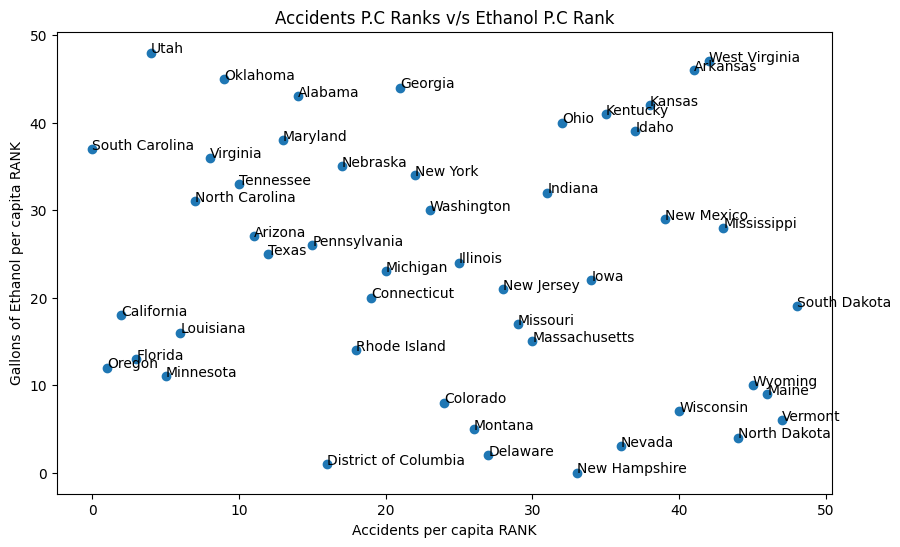

In [33]:
x = [x[1] for x in acc_to_eth_list]
y = [x[2] for x in acc_to_eth_list]
plt.figure(figsize=(10, 6))
plt.scatter(x,y)
plt.title("Accidents P.C Ranks v/s Ethanol P.C Rank")
plt.xlabel("Accidents per capita RANK")
plt.ylabel("Gallons of Ethanol per capita RANK")
# Add labels to each point
for i, name in enumerate([x[0] for x in acc_to_eth_list]):
    plt.annotate(name, (x[i], y[i]))

# Show the plot
plt.show()

In [34]:
from scipy import stats
res = stats.spearmanr(chloro_data_accidents["Ethanol_per_capita"],chloro_data_accidents["Accidents_per_capita"])
res.statistic

np.float64(-0.16204081632653058)

Like we saw in the scatter plot, There is no correlation between the alcohol drinking states and the accident states.

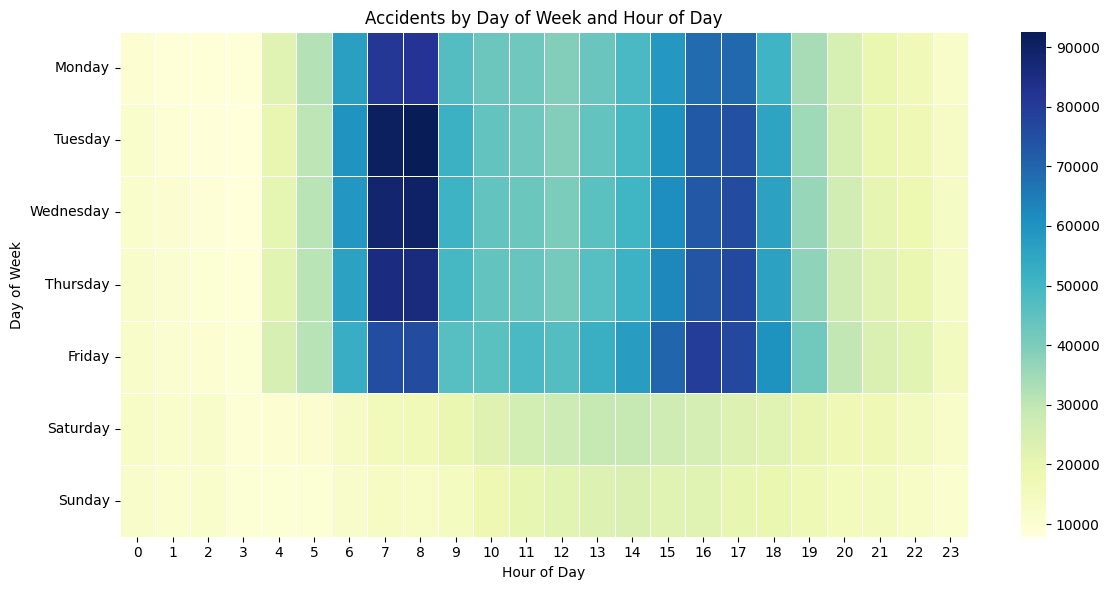

In [35]:
result = df.groupby('Day_of_Week').size()
result

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Start_Time to datetime and extract the hour
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour

# Pivot the data to create a Day vs. Hour matrix
heatmap_data = df.pivot_table(index='Day_of_Week', columns='Hour', 
                              values='Severity', aggfunc='count', fill_value=0)

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False, fmt="d", linewidths=.5)
plt.title("Accidents by Day of Week and Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()


In [36]:
import pandas as pd
import plotly.graph_objects as go


# # Aggregate data by year
aggregated_df = merged_df_all_beverages.groupby('Year').agg(
    {'Gallons_of_Ethanol': 'sum', 'Accidents_per_capita': 'sum'}
).reset_index()

aggregated_population_df = df.groupby('Year').size().reset_index(name='population')

fig = go.Figure()

# Add alcohol consumption line
fig.add_trace(
    go.Scatter(
        x=aggregated_df['Year'],
        y=aggregated_df['Gallons_of_Ethanol'],
        mode='lines+markers',
        name='Alcohol Consumption (Ethanol per capita)',
        line=dict(color='blue')
    )
)

fig.update_layout(
    title='Time Series of Alcohol Consumption',
    xaxis_title='Year',
    yaxis_title='Gallons',
    legend_title='Metrics',
    template='plotly_white'
)

fig.show()

# # Aggregate data by year
aggregated_df = merged_df_all_beverages.groupby('Year').agg(
    {'Gallons_of_Ethanol': 'sum'}
).reset_index()

aggregated_population_df = df.groupby('Year').size().reset_index(name='population')

fig2 = go.Figure()

# Accidents line
fig2.add_trace(
    go.Scatter(
        x=aggregated_population_df['Year'],
        y=aggregated_population_df['population'],
        mode='lines+markers',
        name='Accidents',
        line=dict(color='red')
    )
)

fig2.update_layout(
    title='Time Series of Accidents',
    xaxis_title='Year',
    yaxis_title='People',
    legend_title='Metrics',
    template='plotly_white'
)

fig2.show()


In [47]:
import pandas as pd
from sklearn.cluster import DBSCAN
import plotly.express as px
pd.options.mode.chained_assignment = None 

# Take state data for year 2021
state_df = df[(df['Year'] == 2021) & (df['State'] == "South Carolina")]

# Prepare data for DBSCAN
coordinates = state_df[['Start_Lat', 'Start_Lng']].values

from sklearn.preprocessing import StandardScaler

# Scale the data (optional, but improves clustering in some cases)
scaler = StandardScaler()
scaled_coordinates = scaler.fit_transform(coordinates)

# Run DBSCAN
# Epsilon defines the radius around each point, and min_samples defines the minimum number of points required to form a dense region
dbscan = DBSCAN(eps=0.008, min_samples=2)
dbscan.fit(scaled_coordinates)

# Add cluster labels to the DataFrame
state_df['Cluster'] = dbscan.labels_

noise_count = len(state_df[state_df['Cluster'] == -1])

n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print(f"Total number of accidents occured in the state: {(state_df.shape[0])}")
print(f"Number of clusters (excluding noise): {n_clusters}")
print(f"Number of noise present: {noise_count}")

# Separate noise points
state_df['Cluster'] = state_df['Cluster'].apply(lambda x: 'Noise' if x == -1 else x)

# Visualize clusters on a map
fig = px.scatter_mapbox(
    state_df,
    lat='Start_Lat',
    lon='Start_Lng',
    color='Cluster',  # Different colors for clusters
    hover_data={'Cluster': True},
    # center=dict(lat=39.5, lon=-83.5),
    zoom=3,
    mapbox_style='carto-positron',
    title='DBSCAN Clustering of Accident Locations'
)

# Show the map
fig.show()

Total number of accidents occured in the state: 79651
Number of clusters (excluding noise): 5277
Number of noise present: 5161


In [87]:
from geopy.distance import geodesic
def calculate_avg_distance(tdf):
    results = []
    for cluster in tdf['Cluster'].unique():
        cluster_points = tdf[tdf['Cluster'] == cluster]
        # Compute cluster centroid
        centroid = (
            cluster_points['Start_Lat'].mean(),
            cluster_points['Start_Lng'].mean()
        )
        lat = cluster_points['Start_Lat'].mean()
        long = cluster_points['Start_Lng'].mean()
        # Compute distances to centroid
        distances = cluster_points.apply(
            lambda row: geodesic((row['Start_Lat'], row['Start_Lng']), centroid).miles,
            axis=1
        )
        # Compute average distance
        avg_distance = distances.mean()
        results.append({'Cluster': cluster, 'Centroid': centroid, 'Avg_Distance_miles': avg_distance, 'Lat': lat, 'Long': long})
    return pd.DataFrame(results)

cluster_distances = calculate_avg_distance(state_df)

cluster_distances = cluster_distances[cluster_distances['Cluster'] != 'Noise']

# print(cluster_distances[['Centroid', 'Avg_Distance_miles']].sort_values(by="Avg_Distance_miles", ascending=False).head(10).to_string(index=False))

print("\nMaximum average distance from the checkpoint (Centroid)", round(max(cluster_distances['Avg_Distance_miles'])), " miles" )


Maximum average distance from the checkpoint (Centroid) 11  miles
